**AZ Watch** is a popular video streaming platform specialized in educational content, where creators publish online video tutorials and lessons about any topic, from speaking a new language to cooking to learning to play a musical instrument.

Their next goal is to leverage AI-driven solutions to analyze and make predictions about their subscribers and improve their marketing strategy around attracting new subscribers and retaining current ones. This project uses machine learning to predict subscribers likely to churn and find customer segments. This may help AZ Watch find interesting usage patterns to build subscriber personas in future marketing plans!

![Woman working on multiple screens](marketinganalytics.jpg)


The `data/AZWatch_subscribers.csv` **dataset** contains information about subscribers and their status over the last year:

|Column name|Description|
|-----------|-----------|
|`subscriber_id`|The unique identifier of each subscriber user|
|`age_group`|The subscriber's age group|
|`engagement_time`|Average time (in minutes) spent by the subscriber per session|
|`engagement_frequency`|Average weekly number of times the subscriber logged in the platform (sessions) over a year period|
|`subscription_status`|Whether the user remained subscribed to the platform by the end of the year period (subscribed), or unsubscribed and terminated her/his services (churned)|

Carefully observe and analyze the features in the dataset, asking yourself if there are any **categorical attributes** requiring pre-processing?

The subscribers dataset from the `data/AZWatch_subscribers.csv` file is already being loaded and split into training and test sets for you:

In [138]:
# Import the necessary modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

# Specify the file path of your CSV file
file_path = "data/AZWatch_subscribers.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Separate predictor variables from class label
X = df.drop(['subscriber_id','subscription_status'], axis=1)
y = df['subscription_status']

In [139]:
# Start your code here! Use as many cells as you like!

# view the data
X.head()

,age_group,engagement_time,engagement_frequency
0,18-34,5.55,7
1,under 18,5.12,12
2,35 and over,4.25,4
3,18-34,8.54,15
4,18-34,12.12,20


In [140]:
# mising info on variables
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age_group             1000 non-null   object 
 1   engagement_time       1000 non-null   float64
 2   engagement_frequency  1000 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB


In [141]:
# missing info for the target
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: subscription_status
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [142]:
# create data frame for age group dummies
ages = pd.get_dummies(X['age_group'], drop_first=True) # 18-34 years has been dropped

ages.head()

,35 and over,under 18
0,0,0
1,0,1
2,1,0
3,0,0
4,0,0


In [143]:
# merge back into the same df but drop the original variable
X = pd.concat([X, ages], axis=1)
X = X.drop('age_group', axis=1)

X.head()

,engagement_time,engagement_frequency,35 and over,under 18
0,5.55,7,0,0
1,5.12,12,0,1
2,4.25,4,1,0
3,8.54,15,0,0
4,12.12,20,0,0


In [144]:
# Split intro training and test sets (20% test)
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=.2, random_state=42)

In [145]:
# scaling the data

# initiliaze
scaler = StandardScaler()

# create the columns to scale
cols_scale = ['engagement_time', 'engagement_frequency']

# set up new df and fit transform scaler
X_train_scaled = X_train.copy()
X_train_scaled[cols_scale] = scaler.fit_transform(X_train_scaled[cols_scale])

# view df
X_train_scaled

,engagement_time,engagement_frequency,35 and over,under 18
29,-0.441397,-1.126173,1,0
535,-1.246811,-0.154462,1,0
695,-0.560584,1.465057,1,0
557,0.270111,0.007490,0,1
836,0.237606,-0.802269,0,0
...,...,...,...,...
106,-0.910921,-0.316413,1,0
270,-1.145683,-0.640317,0,1
860,0.533767,0.817249,1,0
435,-0.441397,-0.640317,1,0


In [146]:
# apply transformation to the test data
X_test_scaled = X_test.copy()

X_test_scaled[cols_scale] = scaler.transform(X_test_scaled[cols_scale])

X_test_scaled

,engagement_time,engagement_frequency,35 and over,under 18
521,-0.542525,0.979201,0,0
737,0.884104,0.655298,1,0
740,0.136478,0.007490,0,0
660,-0.358328,-0.802269,1,0
411,0.609613,0.331394,0,1
...,...,...,...,...
408,0.475979,0.169442,0,0
332,-0.119954,0.331394,1,0
208,1.382521,0.655298,0,0
613,-0.336657,-0.964221,0,1


In [147]:
# model 1 logistic regression
logreg = LogisticRegression()
model1 = logreg.fit(X_train_scaled, y_train)

# model 2 decision tree
dtc = DecisionTreeClassifier()
model2 = dtc.fit(X_train_scaled, y_train)

# model 3 random forest
rfc = RandomForestClassifier()
model3 = rfc.fit(X_train_scaled, y_train)

In [148]:
# assess the initial accuracy scores for each model
# use X_test_scaled and y_test

# model 1 - logreg
print(model1.score(X_test_scaled, y_test))
# 0.925

# model 2 - decision tree
print(model2.score(X_test_scaled, y_test))
# 0.875

# model 3 - random forest
print(model3.score(X_test_scaled, y_test))
# 0.895

0.925
0.88
0.895


We notice here, the most basical model, logistic regression, produced the most accurate results. While it exceeds the threshold of 90%, I would like to try and improve the scores for all 3 models. We will use GridSearchCV() for our hyperparameter tuning. 

In [149]:
from sklearn.model_selection import GridSearchCV

In [150]:
# Model 1 tuning
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', None],
             'fit_intercept': [True, False],
             'class_weight': ['balanced', None]}

logreg_cv = GridSearchCV(logreg, param_grid)
logreg_cv.fit(X_train_scaled, y_train)

# best params and score
print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

{'class_weight': None, 'fit_intercept': True, 'penalty': None}
0.8924999999999998


In [151]:
# Model 2 tuning
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
             'max_depth': np.arange(0,10),
             'class_weight': ['balanced', None]}

dtc_cv = GridSearchCV(dtc, param_grid)
dtc_cv.fit(X_train_scaled, y_train)

# best parms and score
print(dtc_cv.best_params_)
print(dtc_cv.best_score_)

{'class_weight': None, 'criterion': 'gini', 'max_depth': 3}
0.89875


In [152]:
# Model 3 tuning
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
             'max_depth': np.arange(0,10),
             'class_weight': ['balanced', None]}

rfc_cv = GridSearchCV(rfc, param_grid)
rfc_cv.fit(X_train_scaled, y_train)

# best params and score
print(rfc_cv.best_params_)
print(rfc_cv.best_score_)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3}
0.905


At the end of the tuning, we were able to improve the accuracy score of models 2 and 3. However, the highest accuracy score still remains as the simple logistic regression model with 0.925.

We will use that as our score variable. 

In [153]:
# final score over 90%
score = model1.score(X_test_scaled, y_test)
print("The final score we select is: " + str(score))

The final score we select is: 0.925


Approaching the customer segmentation

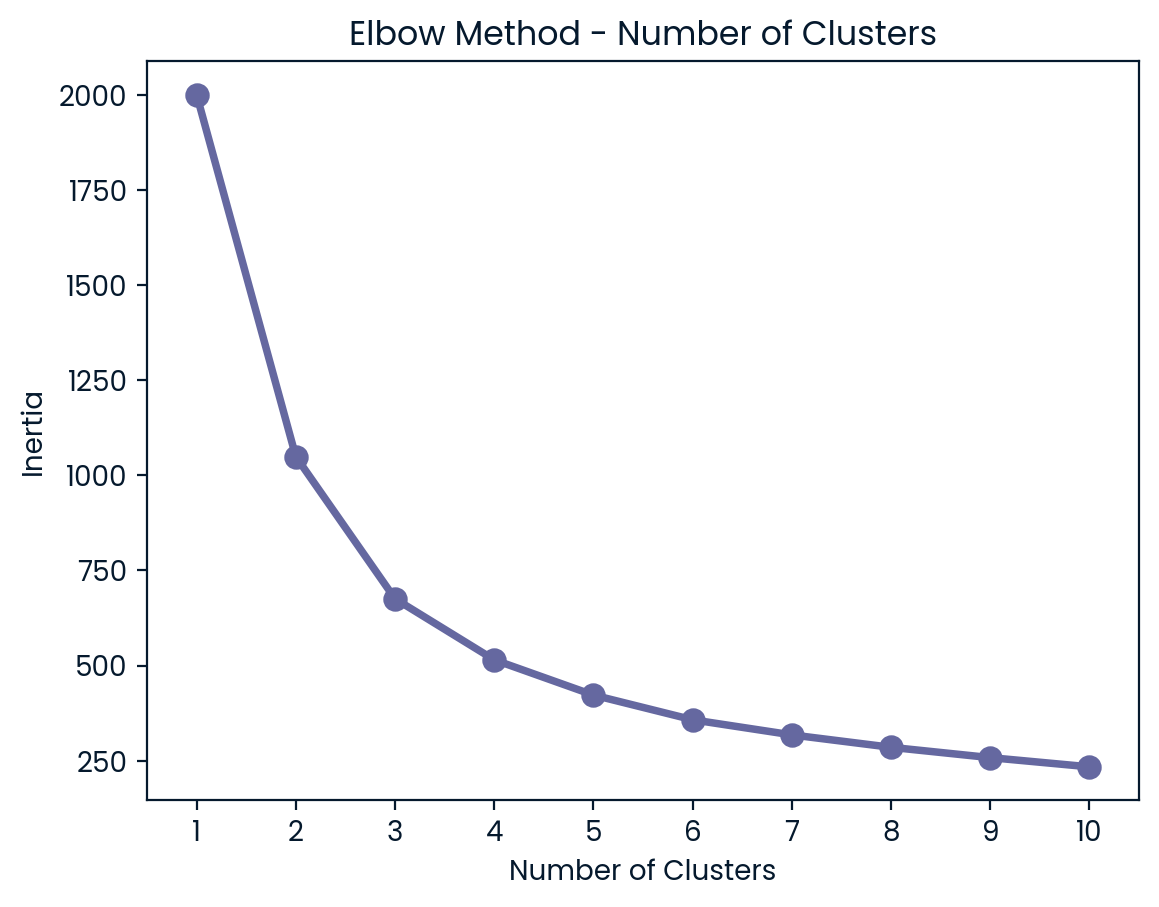

In [154]:
# set up the Kmeans and the iteration through number of clusters
# use only the numerical values

segmentation = X.drop(['35 and over', 'under 18'], axis=1)
segmentation

# initiate scaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(segmentation)

# to store the inertia values
sse = {}

# run through number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state=42)
    kmeans.fit(X_normalized)
    sse[i] = kmeans.inertia_
    

# plot the inertia values
plt.title("Elbow Method - Number of Clusters")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()
    

3 Clusters is the smallest angle here. We will use that as our criterion. 

In [155]:
# create the optimal clustering groups
kmeans = KMeans(n_clusters=3, random_state=42)

# fit
kmeans.fit_predict(X_normalized)

# labels
cluster_id = kmeans.labels_

In [156]:
# apply the new clusters to the data we have
segmentation = pd.DataFrame(segmentation)
segmentation.rename(columns={0:'engagement_time', 1:'engagement_frequency'}, inplace=True)
segmentation = segmentation.assign(cluster_id = cluster_id)

segmentation

,engagement_time,engagement_frequency,cluster_id
0,5.55,7,1
1,5.12,12,2
2,4.25,4,1
3,8.54,15,2
4,12.12,20,2
...,...,...,...
995,3.12,23,2
996,5.25,8,1
997,2.37,5,1
998,8.19,8,0


In [157]:
# store final result in analysis and see the average values
analysis = segmentation.groupby(['cluster_id']).agg({
    'engagement_time': ['mean'],
    'engagement_frequency':['mean']
}).round(0)

analysis

,engagement_time,engagement_frequency
,mean,mean
cluster_id,,
0,9.0,9.0
1,4.0,5.0
2,7.0,18.0
